<a href="https://colab.research.google.com/github/pr-nit/NN-for-Sine-Regression/blob/main/NN_for_Sin_Regression_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パターン認識・演習　ニューラルネットワークの基礎
下記の点を目的とするニューラルネットワークの演習です。

* ニューラルネットワークで回帰問題を解くことを体験する
* 回帰において個々のニューロンの出力を基底関数と解釈出来ることを理解する
* 初期値に依存して学習結果や結果に至る過程が異なりうることを理解する


# 1. 各種モジュールの読み込み
下記左の三角形をクリックして実行してください。プログラムの変更は不要です。

In [ ]:
# Macの問題回避
# import os
# import platform
# if platform.system() == 'Darwin':
#     os.environ['KMP_DUPLICATE_LIB_OK']='True'
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Input
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt


# 2. 訓練データの生成
訓練用のデータ (x,y)と訓練中の性能評価用のデータ(x_test, y_test)を生成します。訓練用のデータも評価用データもNUM個ずつ生成します。
* *x*: 0以上1未満の乱数。 サイズ NUM の配列
* *y*: *y* = sin (2π*fx* )

下記プログラム中の変数は次のとおり
* pi: 円周率
* NUM: 訓練データの数・評価用データの数
* FREQ: 回帰したい関数は三角関数。その周波数。

下記二つのセルを、三角形をクリックすることで上から順に実行してください。
2番目の三角形をクリックすると、生成したデータのグラフが表示されます。FREQ=2の場合、2つの波が続くグラフになるはずです。（点が密集して分かりにくいですが、青い点は順序のランダムなNUM個の点です）

In [ ]:
# 訓練データの生成
# 円周率　π
pi = np.pi
# 周波数
FREQ = 2.0
# 訓練データの数・評価用
NUM = 1000

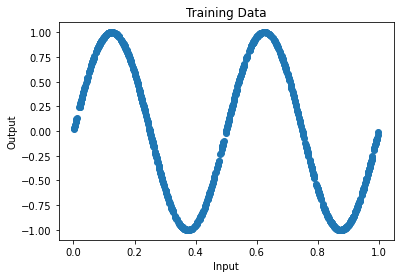

In [ ]:
# 学習データの生成
x = np.random.rand( NUM )
y = np.sin( 2.0*pi*FREQ*x )
# 評価データの生成
x_test = np.random.rand( NUM )
y_test = np.sin( 2.0*pi*FREQ*x_test )
# 学習データのグラフの表示（横軸x, 縦軸y)
plt.scatter(x,y)
plt.title('Training Data')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

# 3. ニューラルネットワークの構築
次に、入力→中間層→出力 の3層からなるニューラルネットワークをデザインします。入力xも出力yもスカラなので、入力層のニューロンは1つ、出力層のニューロンの出力も1つです。

プログラムの読み方を簡単に解説します。

* **model = Sequential():** 層を積み重ねたニューラルネットワークをこれから作る宣言です。
* **model.add:**  層を追加します。2層目から順に追加します
  * 1層目は2層目を作るときにデザイン出来てしまいます
* **Dense:** 全結合の層を追加します。つまり、前の層の全てのニューロンを、いま作る層のニューロン全てと結合させます。
  * 引数によりニューロンの数と活性化関数と入力の次元を指定します。
  * 2層目はZ_NUM個のニューロンを用意して、それらの活性化関数はtanhにして、前の層の出力は1次元とします。
  * 3層目はニューロンは一つで、活性化関数は恒等関数(linear)です。
* **optimizers:** 最適化の準備をします。ここではStatistical Gradient Descentを採用します。
  * **learning_rate:** 勾配ベクトルに掛ける係数（資料ではε）
  * **decay:**Learning rateを学習が進むにつれて小さくするための係数です。学習の初期には大胆に係数を更新して、次第に更新に慎重になるための仕掛けです。
* **model.compile:**コスト関数と最適化法を指定します
  * **loss='mean_square_error':** 二乗誤差をコストにします。
  * **'sgd':** 確率的勾配法で最適化します。

下のセルを三角形を上から順にクリックすることで実行してください。最初のセルで、2層目のニューロンの数を指定するための変数Z_NUMを定めます。

In [ ]:
# 中間層のニューロンの数
Z_NUM = 5

In [ ]:
# 層の構築
model = Sequential()
# 2層目の追加
model.add(Dense(Z_NUM, activation = 'tanh', input_dim = 1))
# 3層目の追加
model.add(Dense(1, activation = 'linear'))
# 確率的勾配法のデザイン
sgd = optimizers.SGD( learning_rate = 0.01, decay = 1e-6 )
# コスト関数(loss関数)と最適化法の指定
model.compile( loss = 'mean_squared_error', optimizer = 'sgd' )

# 4. 学習
学習を開始します。
* **model.fit:** 最適化計算により係数を更新します。
  * **epochs:** ニューラルネットワークの重み係数を更新する回数を指定します。全てのデータを1回ずつ使って更新すると1 epochです。
  * **batch_size:** 沢山ある学習データのうち、batch_size個のデータのみをランダムに選んで更新に使います。1 epochの更新のためにはバッチの選択と更新を複数回実行しなければいけません。
* **model.evaluate:** 学習には使っていないデータにより現状のニューラルネットワークの性能を評価します。
* **print(score):** 1pochごとに評価値を印字します。

下のセルを、三角形を上から順にクリックすることで実行してください。最初のセルで、パラメータの更新回数を指定するための変数EPOCHを定めます。

EPOCH=10000のとき、実行時間は5分から10分程度かかります。気長に待って下さい。ニューラルネットワークの係数の初期値が毎回違うので、学習過程は実行のたびに異なります。lossの値が0.1より小さくなれば「成功」です。lossの下がり方は一様ではなく、途中で急激に下がりだすこともあります。運悪くlossが下がらないこともあります。何度か実行して下さい。

In [ ]:
# パラメータの更新回数の指定
EPOCH = 10000

In [ ]:
###### 学習開始
result = model.fit(x, y, epochs=EPOCH, batch_size = 64)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

# 5. 学習過程の確認
横軸にエポック数、縦軸にコスト関数の値を示すグラフを表示します。多くの人は、ロスの変化が一様ではないことに気付くことになると思います。

In [ ]:
# Lossの変化の可視化（横軸：エポック、縦軸：コスト関数）
plt.plot(range(1, EPOCH+1), result.history['loss'], label="LOSS")
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend()
plt.show()

# 6. 学習結果の確認
学習済みのニューラルネットワークに新しいデータを入力して、出力を確認する
* **test_input:** 新規に生成したデータ。0から1まで0.01刻みで値を生成
* **model_predict:**学習済みニューラルネットワークによる出力 

In [ ]:
%matplotlib inline

###### 学習データの描画
plt.scatter(x,y, label='training data')

###### 新規入力データに対する予測結果の描画
test_input = np.arange(0,1,0.01)
test_output = model.predict(test_input)
test_output.reshape(len(test_output),)
plt.scatter(test_input, test_output, label='estimated')
plt.legend()
plt.show()



# 各ニューロンが獲得した基底関数の表示
Z_NUM個のニューロンが獲得した基底関数を色を分けて表示

In [ ]:
###### Visualization
# Get Coefficietns
a = model.layers[0].get_weights()
b = model.layers[1].get_weights()

# 関数を表示する定義域
u = (np.arange(0,1,0.01))[:,np.newaxis] # column vector
# 中間層への入力・重みとの線形演算
w = np.dot(u, a[0])+a[1]
# 活性化関数 (tanh)
v = np.tanh(w)
# 各ニューロンの出力の計算
out = np.dot(v,b[0])+b[1]
# 表示
plt.scatter(x,y, label='training data')
plt.scatter(u,out, label='estimated')
for i in range(Z_NUM):
    plt.plot(u,v[:,i], label=i)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,
           ncol=1,
           mode="expand")
plt.show()


